In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    TimeDistributed, BatchNormalization, LSTM
)
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)


## CNN

In [ ]:
min_mel = -80
max_mel = 0

In [ ]:
data_train_cnn = np.load("CNN_train_data.npz")
data_val_cnn = np.load("CNN_test_data.npz")

In [ ]:
#X_train_cnn = (data_train_cnn["data"] - min_mel)/(max_mel-min_mel)
X_train_cnn = data_train_cnn["data"]
y_train_cnn = data_train_cnn["label"]

In [ ]:
X_train_cnn.min()

np.float32(0.0)

In [ ]:
X_train_cnn.max()

np.float32(1.0)

In [ ]:
#X_val_cnn = (data_val_cnn["data"] - min_mel)/(max_mel-min_mel)
X_val_cnn = data_val_cnn["data"]
y_val_cnn = data_val_cnn["label"]

In [ ]:
# Lightweight CNN Model
model_cnn = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 1), name='conv2d_1'),
    MaxPooling2D(2, 2, name='maxpool_1'),

    Conv2D(16, (3, 3), activation='relu', name='conv2d_2'),
    MaxPooling2D(2, 2, name='maxpool_2'),

    Flatten(name='flatten'),
    Dense(32, activation='relu', name='dense_1'),
    Dropout(0.3, name='dropout_1'),

    Dense(1, activation='sigmoid', name='output')  # Binary classification
])

# Compile the model
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_cnn = model_cnn.fit(
    X_train_cnn,
    y_train_cnn,
    epochs=30,
    validation_split=0.2,  # Gunakan 20% dari training data sebagai validasi internal
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7307 - loss: 0.5080 - val_accuracy: 0.8507 - val_loss: 0.3515
Epoch 2/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8504 - loss: 0.3432 - val_accuracy: 0.8907 - val_loss: 0.2738
Epoch 3/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8816 - loss: 0.2827 - val_accuracy: 0.9050 - val_loss: 0.2319
Epoch 4/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8996 - loss: 0.2474 - val_accuracy: 0.9194 - val_loss: 0.2139
Epoch 5/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9133 - loss: 0.2130 - val_accuracy: 0.9237 - val_loss: 0.1858
Epoch 6/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9256 - loss: 0.1910 - val_accuracy: 0.9370 - val_loss: 0.1696
Epoch 7/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9343 - loss: 0.1738 - val_accuracy: 0.9408 - val_loss: 0.1648
Epoch 8/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9400 - loss: 0.1596 - val_acc

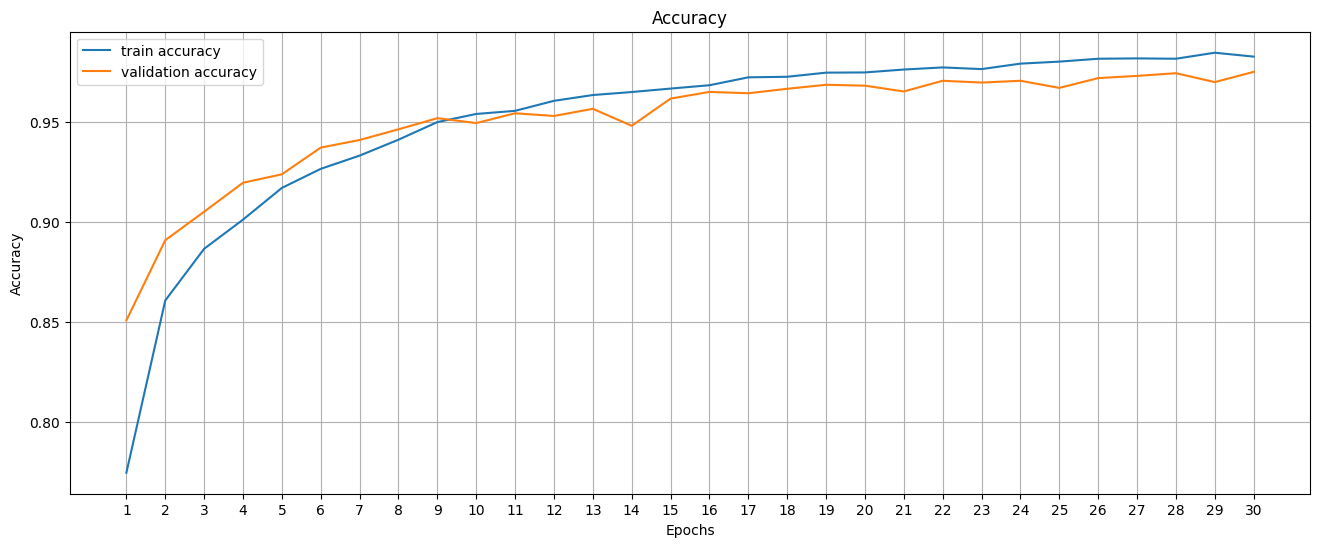

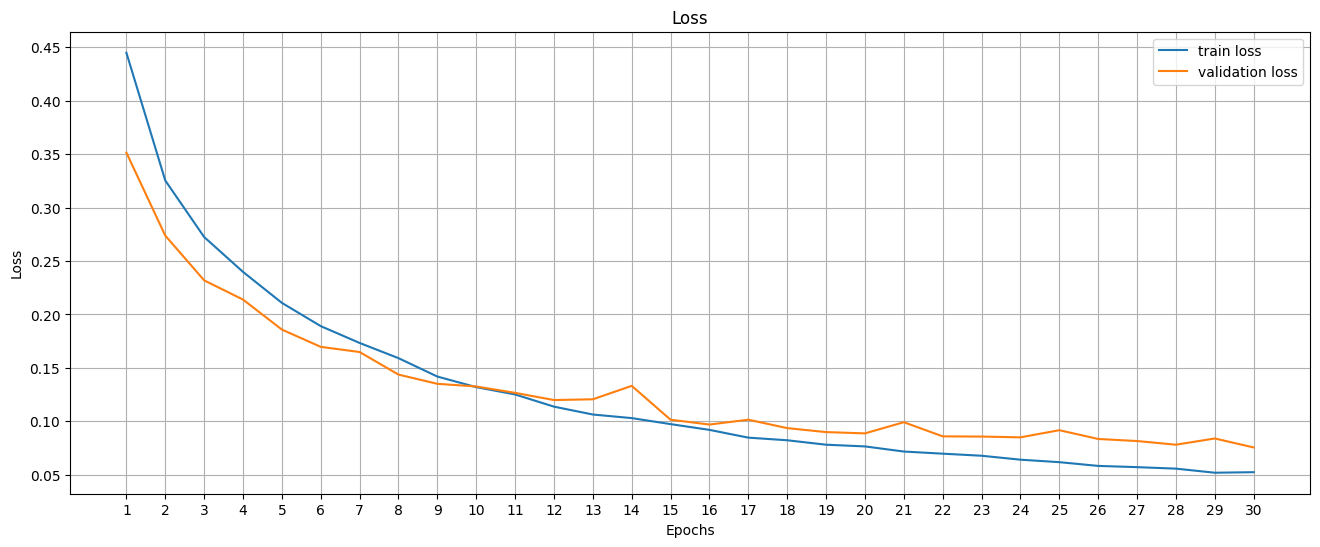

In [ ]:
train_acc_cnn = history_cnn.history['accuracy']
val_acc_cnn = history_cnn.history['val_accuracy']
train_loss_cnn = history_cnn.history['loss']
val_loss_cnn = history_cnn.history['val_loss']

epochs = range(1, len(train_acc_cnn) + 1)  # buat range dari 1 sampai jumlah epoch

plt.figure(figsize=(16, 6))
plt.plot(epochs, train_acc_cnn, label="train accuracy")
plt.plot(epochs, val_acc_cnn, label="validation accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)  # set ticks mulai dari 1
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(epochs, train_loss_cnn, label="train loss")
plt.plot(epochs, val_loss_cnn, label="validation loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)  # set ticks mulai dari 1
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import json

# Simpan history ke file JSON
with open('history_cnn.json', 'w') as f:
    json.dump(history_cnn.history, f)


703/703 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


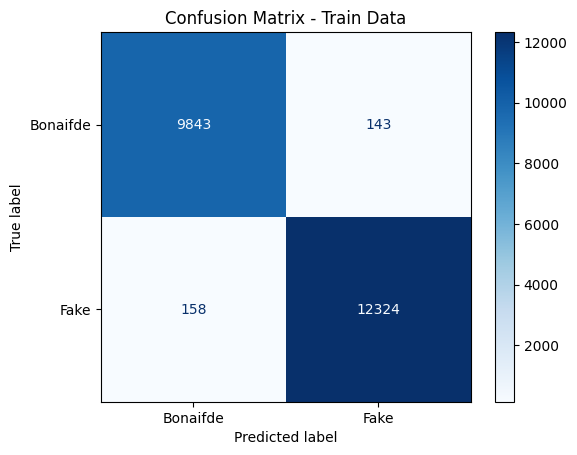

Train Accuracy: 98.66%


In [ ]:

# Prediksi pada data latih
y_pred_train_cnn = model_cnn.predict(X_train_cnn)
y_pred_train_classes_cnn = (y_pred_train_cnn > 0.5).astype("int32")

# Confusion matrix untuk data latih
cm_train_cnn = confusion_matrix(y_train_cnn, y_pred_train_classes_cnn)
disp_train_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_train_cnn, display_labels=["Bonaifde", "Fake"])
disp_train_cnn.plot(cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.show()

# Akurasi data latih
acc_train_cnn = accuracy_score(y_train_cnn, y_pred_train_classes_cnn)
print(f"Train Accuracy: {acc_train_cnn * 100:.2f}%")


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


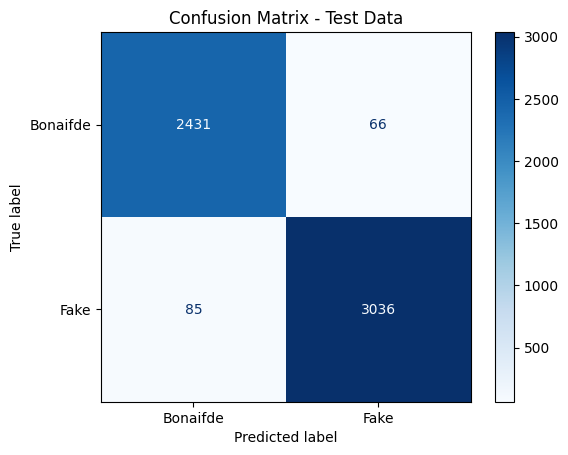

Test Accuracy: 97.31%


In [ ]:
# Sudah Anda tulis, bisa dipertahankan
y_pred_val_cnn = model_cnn.predict(X_val_cnn)
y_pred_val_classes_cnn = (y_pred_val_cnn > 0.5).astype("int32")

cm_val_cnn = confusion_matrix(y_val_cnn, y_pred_val_classes_cnn)
disp_val_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_val_cnn, display_labels=["Bonaifde", "Fake"])
disp_val_cnn.plot(cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.show()

acc_val_cnn = accuracy_score(y_val_cnn, y_pred_val_classes_cnn)
print(f"Test Accuracy: {acc_val_cnn * 100:.2f}%")


In [ ]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_val_cnn, y_pred_val_classes_cnn)
precision = precision_score(y_val_cnn, y_pred_val_classes_cnn)
recall = recall_score(y_val_cnn, y_pred_val_classes_cnn)
f1 = f1_score(y_val_cnn, y_pred_val_classes_cnn)

# Cetak hasil
print(f"Test Accuracy : {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall   : {recall * 100:.2f}%")
print(f"Test F1-Score : {f1 * 100:.2f}%")


Test Accuracy : 97.31%
Test Precision: 97.87%
Test Recall   : 97.28%
Test F1-Score : 97.57%


In [ ]:
model_cnn.save("30mei_model_cnn.h5")


## CNN-LSTM

In [ ]:
data_train_cnn_lstm = np.load("CNN_LSTM_train_data.npz")
data_val_cnn_lstm = np.load("CNN_LSTM_test_data.npz")

In [ ]:
#X_train_cnn_lstm = (data_train_cnn_lstm["data"] - min_mel)/(max_mel-min_mel)
X_train_cnn_lstm = data_train_cnn_lstm["data"]
y_train_cnn_lstm = data_train_cnn_lstm["label"]

In [ ]:
X_train_cnn_lstm.min()

np.float32(0.0)

In [ ]:
X_train_cnn_lstm.max()

np.float32(1.0)

In [ ]:
#X_val_cnn_lstm = (data_val_cnn_lstm["data"]-min_mel)/(max_mel-min_mel)
X_val_cnn_lstm = data_val_cnn_lstm["data"]
y_val_cnn_lstm = data_val_cnn_lstm["label"]

In [ ]:
# Lightweight CNN-LSTM model
model_cnn_lstm = Sequential([
    # TimeDistributed CNN layers
    TimeDistributed(Conv2D(8, (3, 3), activation='relu', padding='same'),
                    input_shape=(32, 128, 4, 1), name="conv2d_1"),
    TimeDistributed(BatchNormalization(), name="batchnorm_1"),
    TimeDistributed(MaxPooling2D((2, 2), padding="same"), name="maxpool_1"),

    TimeDistributed(Conv2D(16, (3, 3), activation='relu', padding='same'), name="conv2d_2"),
    TimeDistributed(MaxPooling2D((2, 2), padding="same"), name="maxpool_2"),

    TimeDistributed(Flatten(), name="flatten"),

    # LSTM layers
    LSTM(64, return_sequences=True, name="lstm_1"),
    LSTM(32, return_sequences=False, name="lstm_2"),

    # Fully connected layers
    Dense(32, activation='relu', name="dense_1"),
    Dropout(0.1, name="dropout_1"),

    Dense(1, activation='sigmoid', name="output")
])

# Compile the model
model_cnn_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Summary
model_cnn_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (TimeDistributed)      │ (None, 32, 128, 4, 8)  │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_1 (TimeDistributed)   │ (None, 32, 128, 4, 8)  │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (TimeDistributed)     │ (None, 32, 64, 2, 8)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (TimeDistributed)      │ (None, 32, 64, 2, 16)  │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (TimeDistributed)     │ (None, 32, 32, 1, 16)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (TimeDistributed)       │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32, 64)         │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,497 (634.75 KB)

 Trainable params: 162,481 (634.69 KB)

 Non-trainable params: 16 (64.00 B)

In [ ]:
history_cnn_lstm = model_cnn_lstm.fit(
    X_train_cnn_lstm,
    y_train_cnn_lstm,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - accuracy: 0.7916 - loss: 0.4252 - val_accuracy: 0.9034 - val_loss: 0.2453
Epoch 2/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 29s 51ms/step - accuracy: 0.9227 - loss: 0.1966 - val_accuracy: 0.9751 - val_loss: 0.0785
Epoch 3/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9822 - loss: 0.0556 - val_accuracy: 0.9662 - val_loss: 0.0920
Epoch 4/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.9889 - loss: 0.0377 - val_accuracy: 0.9918 - val_loss: 0.0304
Epoch 5/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.9932 - loss: 0.0228 - val_accuracy: 0.9944 - val_loss: 0.0190
Epoch 6/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 30s 54ms/step - accuracy: 0.9971 - loss: 0.0122 - val_accuracy: 0.9931 - val_loss: 0.0243
Epoch 7/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9964 - loss: 0.0131 - val_accuracy: 0.9933 - val_loss: 0.0207
Epoch 8/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.9982 - loss: 0.0091 - 

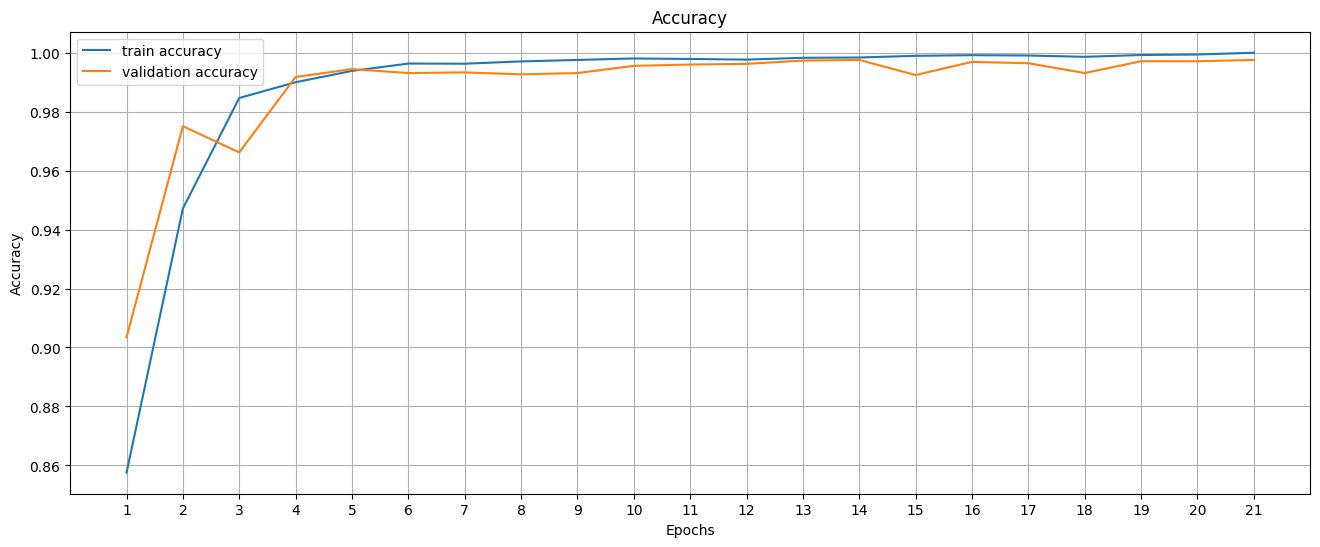

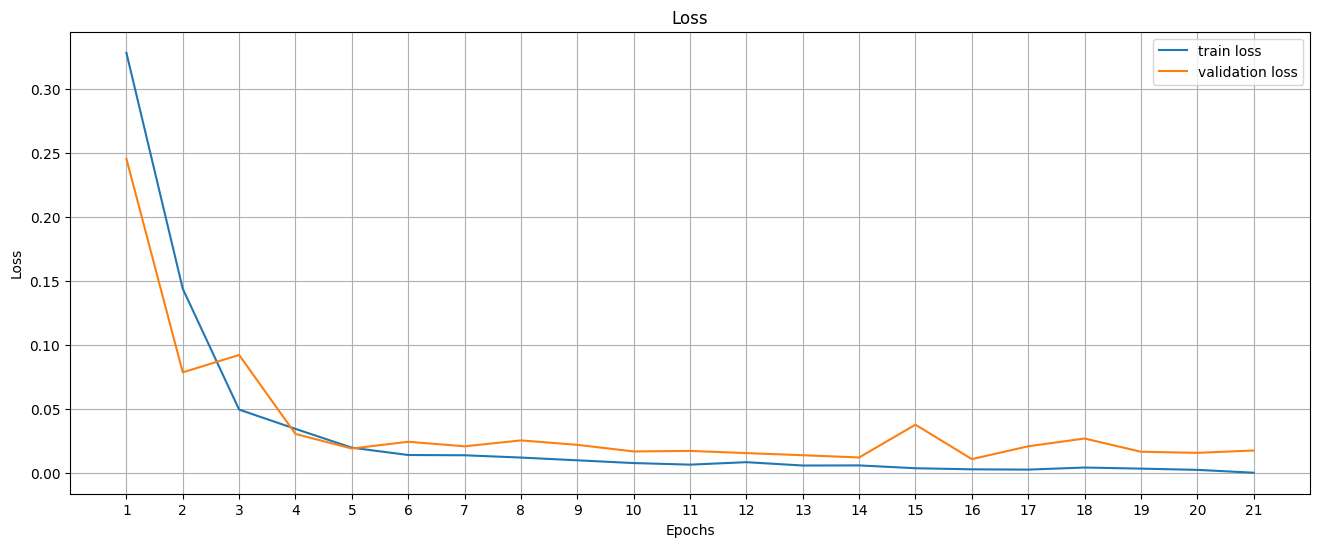

In [ ]:
train_acc_cnn_lstm = history_cnn_lstm.history['accuracy']
val_acc_cnn_lstm = history_cnn_lstm.history['val_accuracy']
train_loss_cnn_lstm = history_cnn_lstm.history['loss']
val_loss_cnn_lstm = history_cnn_lstm.history['val_loss']

epochs = range(1, len(train_acc_cnn_lstm) + 1)  # buat range dari 1 sampai jumlah epoch

plt.figure(figsize=(16, 6))
plt.plot(epochs, train_acc_cnn_lstm, label="train accuracy")
plt.plot(epochs, val_acc_cnn_lstm, label="validation accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)  # set ticks mulai dari 1
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(epochs, train_loss_cnn_lstm, label="train loss")
plt.plot(epochs, val_loss_cnn_lstm, label="validation loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)  # set ticks mulai dari 1
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import json

# Simpan history ke file JSON
with open('history_cnn_lstm.json', 'w') as f:
    json.dump(history_cnn_lstm.history, f)


703/703 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step


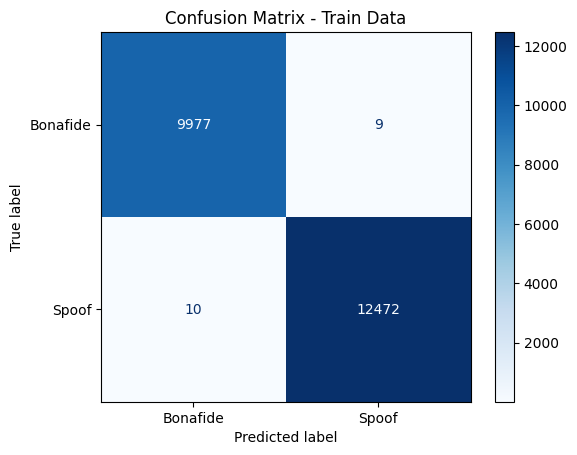

Train Accuracy: 99.92%


In [ ]:
# Prediksi pada data latih
y_pred_train_cnn_lstm = model_cnn_lstm.predict(X_train_cnn_lstm)
y_pred_train_classes_cnn_lstm = (y_pred_train_cnn_lstm > 0.5).astype("int32")

# Confusion matrix untuk data latih
cm_train_cnn_lstm = confusion_matrix(y_train_cnn_lstm, y_pred_train_classes_cnn_lstm)
disp_train_cnn_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_train_cnn_lstm, display_labels=["Bonafide", "Spoof"])
disp_train_cnn_lstm.plot(cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.show()

# Akurasi data latih
acc_train_cnn_lstm = accuracy_score(y_train_cnn_lstm, y_pred_train_classes_cnn_lstm)
print(f"Train Accuracy: {acc_train_cnn_lstm * 100:.2f}%")


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


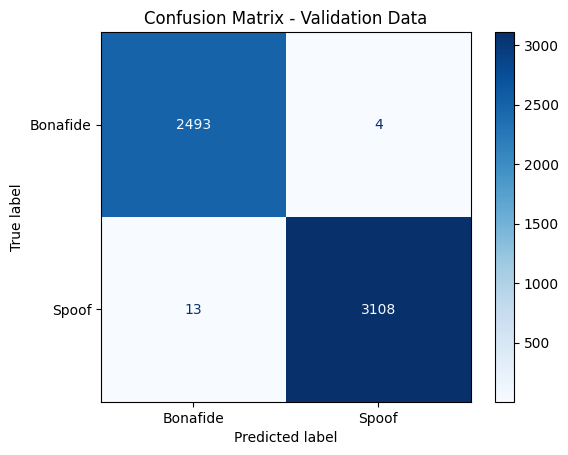

Validation Accuracy: 99.70%


In [ ]:

# Prediksi pada data validasi
y_pred_val_cnn_lstm = model_cnn_lstm.predict(X_val_cnn_lstm)
y_pred_val_classes_cnn_lstm = (y_pred_val_cnn_lstm > 0.5).astype("int32")

# Confusion matrix untuk data validasi
cm_val_cnn_lstm = confusion_matrix(y_val_cnn_lstm, y_pred_val_classes_cnn_lstm)
disp_val_cnn_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_val_cnn_lstm, display_labels=["Bonafide", "Spoof"])
disp_val_cnn_lstm.plot(cmap="Blues")
plt.title("Confusion Matrix - Validation Data")
plt.show()

# Akurasi data validasi
acc_val_cnn_lstm = accuracy_score(y_val_cnn_lstm, y_pred_val_classes_cnn_lstm)
print(f"Validation Accuracy: {acc_val_cnn_lstm * 100:.2f}%")


In [ ]:
model_cnn_lstm.save("30mei_model_cnn_lstm_3.h5")

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0
